
# Work

  請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
  
  請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
  
  (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度



In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 70us/step - loss: 1.9168 - acc: 0.3085 - val_loss: 1.7710 - val_acc: 0.3600
Epoch 2/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.7002 - acc: 0.3926 - val_loss: 1.6785 - val_acc: 0.3993
Epoch 3/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.6134 - acc: 0.4264 - val_loss: 1.5972 - val_acc: 0.4194
Epoch 4/100
50000/50000 [==============================] - 2s 44us/step - loss: 1.5572 - acc: 0.4465 - val_loss: 1.5239 - val_acc: 0.4617
Epoch 5/100
50000/50000 [==============================] - 2s 46us/step - loss: 1.5059 - acc: 0.4631 - val_loss: 1.5044 - val_acc: 0.4695
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 1.4631 - acc: 0.4789 - val_loss: 1.4720 - val_acc: 0.4742
Epoch 7/100
50000/50000 [==============================] - 2s 43us/step - loss: 1.4370 - acc: 0.4866 - val_loss: 1.4667 - 

50000/50000 [==============================] - 2s 43us/step - loss: 0.5459 - acc: 0.8050 - val_loss: 2.0313 - val_acc: 0.5134
Epoch 60/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.5223 - acc: 0.8134 - val_loss: 2.0265 - val_acc: 0.5153
Epoch 61/100
50000/50000 [==============================] - 2s 45us/step - loss: 0.5065 - acc: 0.8179 - val_loss: 2.0972 - val_acc: 0.5226
Epoch 62/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.5008 - acc: 0.8201 - val_loss: 2.1199 - val_acc: 0.5199
Epoch 63/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.4905 - acc: 0.8242 - val_loss: 2.1953 - val_acc: 0.5007
Epoch 64/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4982 - acc: 0.8217 - val_loss: 2.1373 - val_acc: 0.5087
Epoch 65/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4832 - acc: 0.8272 - val_loss: 2.2558 - val_acc: 0.4974
Epoch 66/100
50000/50000 [==============

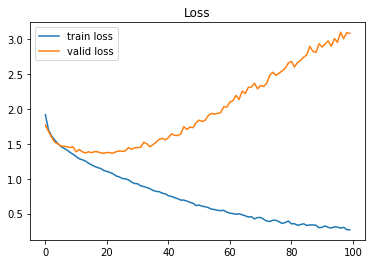

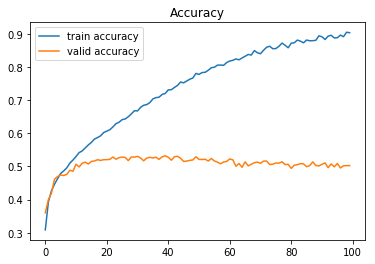

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()